In [60]:
import pandas as pd
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten
import keras.callbacks as callbacks;

In [35]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()
train.shape

(112799, 785)

In [61]:
x_train, x_valid = train[5000:, 1:], train[:5000, 1:]
x_train, x_valid = x_train / 255.0, x_valid/ 255.0
y_train, y_valid = train[5000:, 0], train[:5000, 0]

x_train.shape, y_train.shape

((107799, 784), (107799,))

In [43]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [57]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(300, activation="relu"),
    Dense(y_train_unique.size, activation="softmax")
])

In [58]:
model.summary(), model.input_shape

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 300)               235500    
                                                                 
 dense_26 (Dense)            (None, 300)               90300     
                                                                 
 dense_27 (Dense)            (None, 300)               90300     
                                                                 
 dense_28 (Dense)            (None, 300)               90300     
                                                                 
 dense_29 (Dense)            (None, 47)                14147     
                                                                 
Total params: 520,547
Trainable params: 520,547
Non-tr

(None, (None, 784))

In [59]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [62]:
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb])

Epoch 1/100
3369/3369 [==============================] - 15s 4ms/step - loss: 1.8225 - sparse_categorical_accuracy: 0.5153 - val_loss: 1.0541 - val_sparse_categorical_accuracy: 0.6910A: 1s - loss: 1.9350 - spa
Epoch 2/100
3369/3369 [==============================] - 13s 4ms/step - loss: 0.9136 - sparse_categorical_accuracy: 0.7245 - val_loss: 0.7956 - val_sparse_categorical_accuracy: 0.7564
Epoch 3/100
3369/3369 [==============================] - 12s 4ms/step - loss: 0.7223 - sparse_categorical_accuracy: 0.7749 - val_loss: 0.6808 - val_sparse_categorical_accuracy: 0.7800
Epoch 4/100
3369/3369 [==============================] - 9s 3ms/step - loss: 0.6236 - sparse_categorical_accuracy: 0.8016 - val_loss: 0.6422 - val_sparse_categorical_accuracy: 0.7864
Epoch 5/100
3369/3369 [==============================] - 9s 3ms/step - loss: 0.5631 - sparse_categorical_accuracy: 0.8177 - val_loss: 0.5756 - val_sparse_categorical_accuracy: 0.8088
Epoch 6/100
3369/3369 [==============================] -

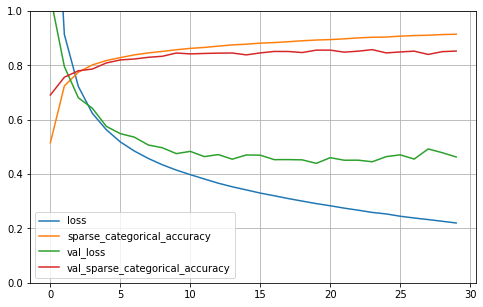

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()